# Kernel-based Methods

Kerned-based methods denote a class of machine learning algorithms which use a so-called **kernel** or **kernel function** to enable the use of a high-dimensional feature space. The purpose is to generate a more flexible machine learning model. This approach is particularly useful to generalize linear learning methods to non-linear settings. In this case, this approach is also referred to as **kernel trick**.

The most common kernel-based methods are support-vector machines (SVM), Gaussian processes (GP), kernel principal component analysis (kernel PCA) and kernel ridge regression. In this chapter, we focus on Gaussian processes which are most usefull for our applications and fit into our probabilistic framework. Nevertheless, the second part of the chapter is dedicated to further kernel-based methods. But first, let us undertand the intuition behind the kernel trick.

## The Kernel Trick: Implicit embeddings for non-linear data

We will talk about kernels in detail later. However, it is important to have an understanding of what kernel trick actually means and why it is useful for machine learning applications. As previously discussed, linear problems can be solved quite efficiently but most real world data sets (at least the ones that require higher effort) have non-linear dependencies. Thus, one idea would be to find an **embedding**, which linearizes the data. In this context, an embedding is a transformation of the original space (and the data in it) to a latent one. Thus, instead of using a linear model in the original space $x \in \mathbb{R}^{1, d}$ with the weights $w_x \in \mathbb{R}^{d}$ 
$$y = x w_x $$
a linear model in the transformed space can be used
$$y = \phi(x) w_\phi $$
where $\phi(\cdot): \mathbb{R}^{1, d} \rightarrow \mathbb{R}^{1, N}$ is the transformation function and $w_\phi \in \mathbb{R}^{N}$ . Note that $N$ is chosen as the embedding dimension for a consistent notation but it could be any positive natural number. The constant (or bias) term is omitted for a more concise notation. Such a model is able to represent non-linear dependencies despite having a linear solution, depending on the non-linearity of $\phi(\cdot)$. However, finding a good mapping $\phi(\cdot)$, which linearizes the problem is not trivial. This is where, the kernel trick helps. 

Let us formally define a kernel, an inner product of the transformation functions:

```{admonition} Definition
:class: tip
:name: def:kernel
Let $x_1, x_2 \in \mathbb{R}^d$ be two points representing observations in the input space and $\phi: \mathbb{R}^d \rightarrow \mathbb{R}^N$ be a map. The map $k: \mathbb{R}^{2d} \rightarrow \mathbb{R}$ is called the **kernel function** of the map $\phi$, if the following holds

$$ k(x_1, x_2) = \langle \phi(x_1), \phi(x_2) \rangle$$

where $\langle \cdot, \cdot \rangle$ denotes the inner product. 
```

We have now defined what a kernel is but it is still not obvious, why or if this is helpful at all. The solution for the linear model was given [previously in the first Chapter.](https://probabilistic-ml.github.io/lecture-notes/01_fund/03_bayes/04_linregr.html)

$$ w_x = \frac{X^T Y}{X^T X} $$

where $X \in \mathbb{R}^{N, d}$ is the matrix of input samples and $yY\in \mathbb{R}^{N}$ the vector of corresponding outputs. Thus, the prediction function can be rewritten as

$$y = x \frac{X^T Y}{X^T X} $$


Similarly, we can denote the solution of $w_\phi$ as

$$ w_\phi = \frac{\phi(X)^T Y}{\phi(X)^T \phi(X)} $$

Using the definition of the kernel function, it can be seen that

$$ w_\phi = \frac{\phi(X)^T Y}{K}  = \phi(X)^T K^{-1} Y = $$

where $K \in \mathbb{R}^{N, N}$ is the so called **kernel matrix** defined as

$$ K = \begin{bmatrix} \phi(x_1)^T\phi(x_1) & \phi(x_1)^T\phi(x_2) & \dots & \phi(x_1)^T\phi(x_N) \\ \phi(x_2)^T\phi(x_1) & \phi(x_2)^T\phi(x_2) & \dots & \phi(x_2)^T\phi(x_N) \\ \vdots & \vdots & \vdots & \vdots \\ \phi(x_N)^T\phi(x_1) & \phi(x_N)^T\phi(x_2) & \dots & \phi(x_N)^T\phi(x_N) \end{bmatrix}$$

We will cover kernels and the kernel matrix more in depth [later](https://probabilistic-ml.github.io/lecture-notes/02_probML/02_kernelmethods/01_GP.html) but for now, it is important to note that $K$ is a positive semi-definite matrix (see [Mercer's Theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem) for details). Rewriting the prediction equation as before yields with some reordering
$$y = \phi(x) \phi(X)^T K^{-1} Y = k(X, x) K^{-1} Y$$



Thus, using a kernel function allows using an implicit definition of $\phi$, which is useful as finding an appropriate $\phi$ is often more difficult than finding an appropriate kernel, hence the name kernel trick. But what about our initial motivation of linearising the problem for an easier solution? This requires a more in depth analysis, which is beyond the scope of this work but the intuition is simple, mapping the low dimensional data to a high dimensional space. Let us consider a binary classification problem to visualize the idea.

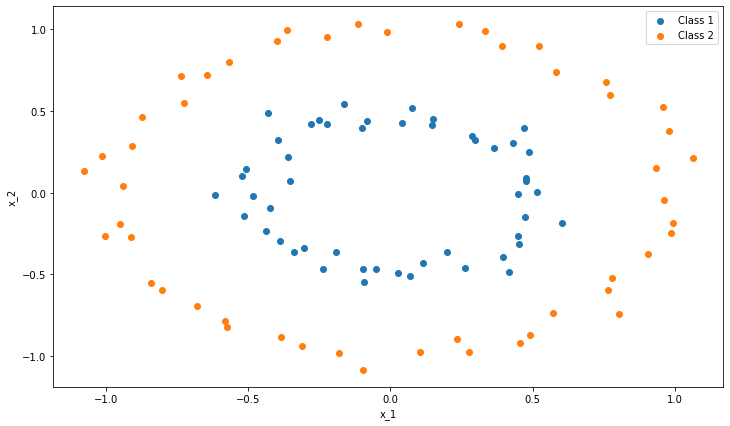

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
np.random.seed(42)

# Create some artificial data
X, y = make_circles(100, noise=.05, factor=0.5)
# create classes
y = y.astype(bool)
not_y = np.logical_not(y)
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(X[y, 0], X[y, 1], label="Class 1")
ax.scatter(X[not_y, 0], X[not_y, 1], label="Class 2")
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
_ = ax.legend()

It can be seen that the decision boundary between the two classes could be represented as a circle but not as a line, which would be easier to estimate. In order to use a linear decision boundary, we can map the data to a higher dimensional space as follows

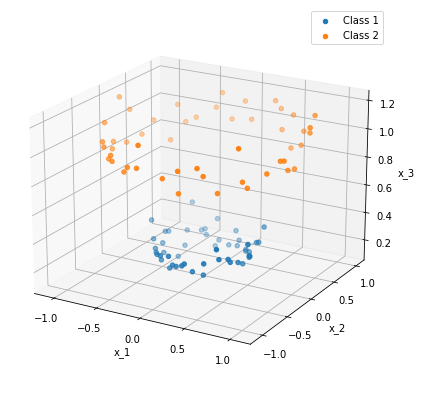

In [2]:
from mpl_toolkits.mplot3d import Axes3D
x_3 = np.sum(X**2, axis=1) # The new dimension that we add to make the problem easier to solve
# Although this works well in this example, it can be seen that finding an appropriate mapping is not trivial
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw={"projection": "3d"})
ax.scatter(X[y, 0], X[y, 1], x_3[y], label="Class 1")
ax.scatter(X[not_y, 0], X[not_y, 1], x_3[not_y], label="Class 2")
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.set_zlabel("x_3")
_ = ax.view_init(elev=20.)
_ = ax.legend()

Thanks to the new dimension, a linear horizontal plane is now sufficient to separate the two classes. In practice, finding a good mapping may be difficult. Nonetheless, the premise of the kernel based methods is finding such a mapping without a need to explicitly defining it.